#Problem:

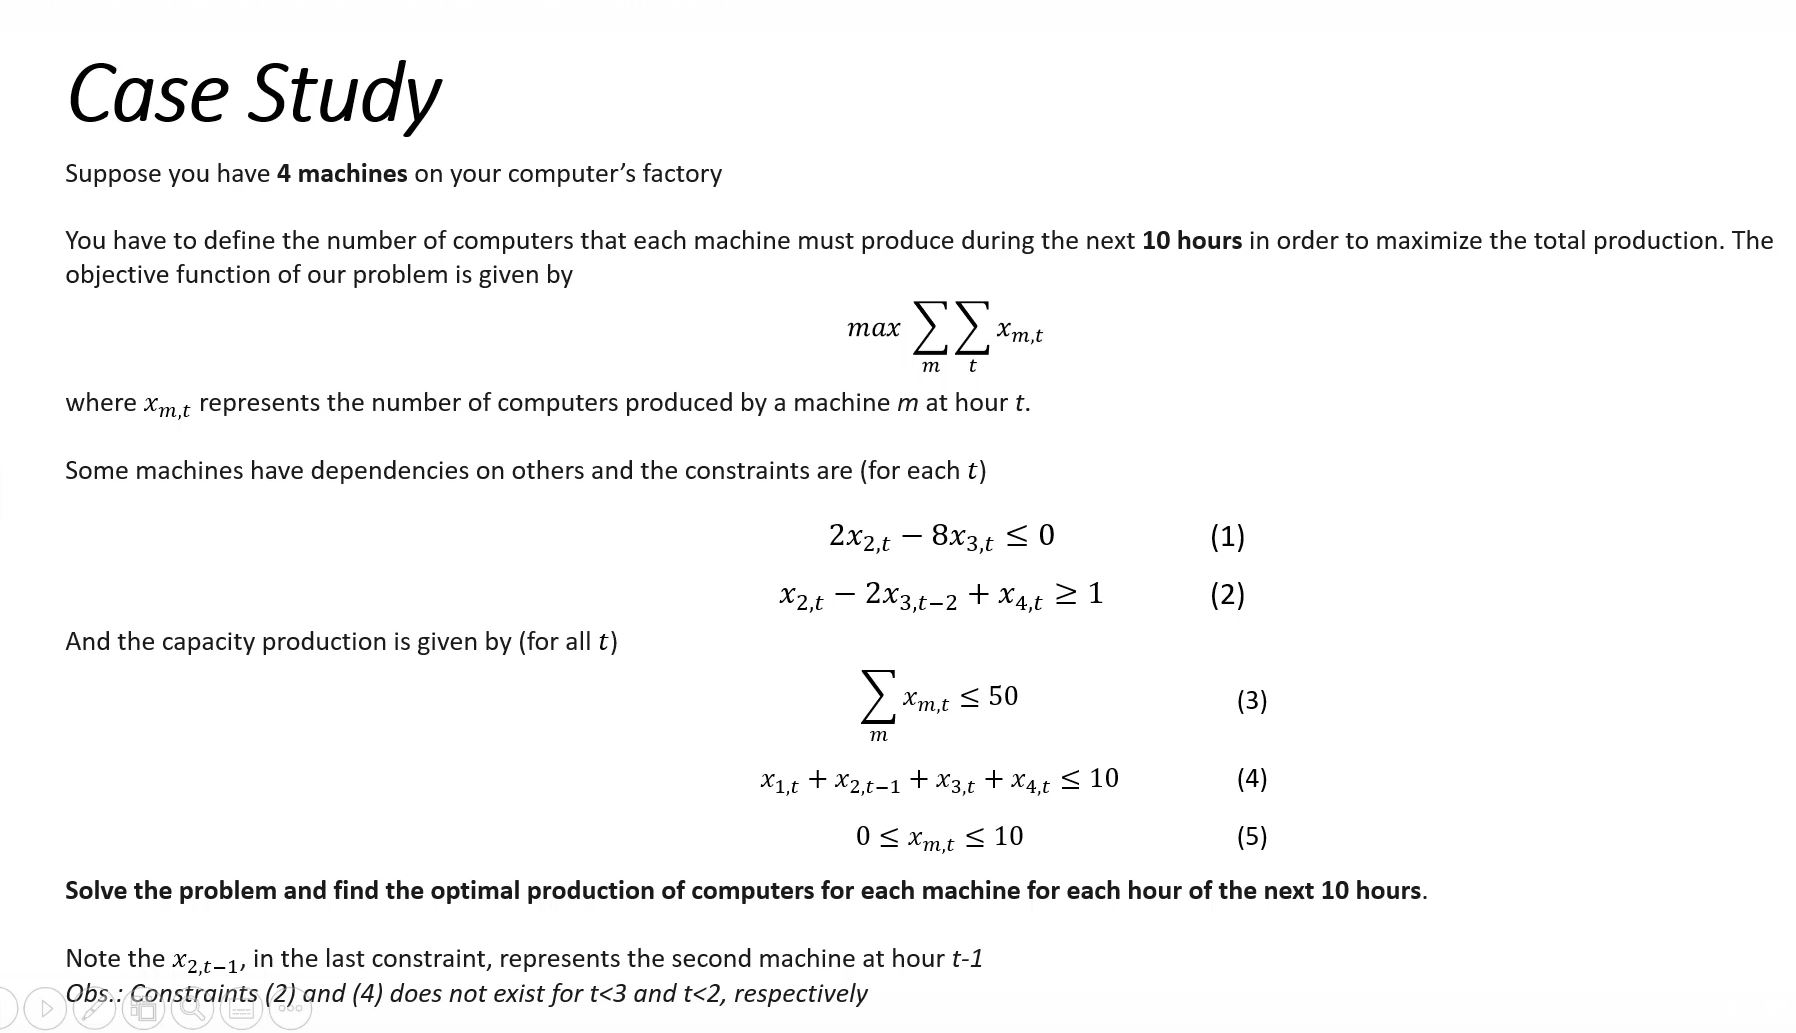

#Solution

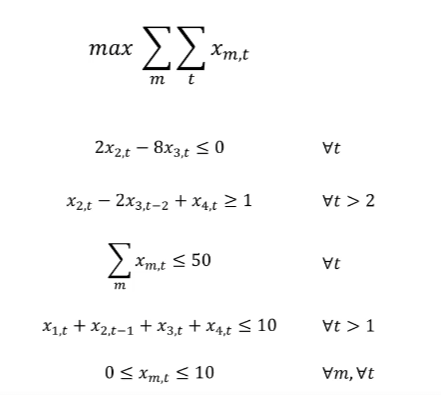

#installation Pyomo


In [ ]:
 !pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [ ]:
!pip install pyomo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
!conda install -c conda-forge glpk

Solving environment: | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - glpk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |     pyhd8ed1ab_0         296 KB  conda-forge
    ca-certificates-2023.5.7   |       hbcca054_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    conda-23.3.1               |  py310hff52083_0         941 KB  conda-forge
    glpk-5.0                   |       h445213a_0        1023 KB  conda-forge
    gmp-6.2.1                  |       h58526e2_0         806 KB  conda-forge
    jsonpatch-1.32             |     pyhd8ed1ab_0          14 KB  conda-forge
    jsonpointer-2.0            |             py_0           9 KB  conda-forge
    openssl-3.1.1              |       hd590300_1         2

#Code

In [ ]:
import pyomo.environ as pyo

#from pyomo.environ import *   (if i used this line then I need not to write(model=pyo.Concretemodel) we can write model=ConcreteModel and so on enery command using pyo)
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
T = 10 #maximum time 10 hours
M = 4 #number of machines

#variables
model.x = pyo.Var(range(1,M+1), range(1,T+1), within=pyo.Integers)#bounds=(0,10) for i bound c5 conmstraint has been made, #x has two dimentions...one 1 to 4 and second 1 to 10...and x must be an integer cause number of computer
x = model.x

#obj function
# model.obj = pyo.Objective(expr = sum([x[m,t] for m in range(1,M+1) for t in range(1,T+1)]), sense=pyo.maximize)

#instead of this we can use summation function
model.obj = pyo.Objective(expr = pyo.summation(x), sense=pyo.maximize)

#I want to sum x in the position of m and t

#constraints
model.C1 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)

model.C2 = pyo.ConstraintList()
for t in range(3,T+1):
    model.C2.add(expr = x[2,t] - 2*x[3,t-2] + x[4,t] >= 1)

model.C3 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C3.add(expr = sum([x[m,t] for m in range(1,M+1)]) <= 50)

model.C4 = pyo.ConstraintList()
for t in range(2,T+1):
    model.C4.add(expr = x[1,t] + x[2,t-1] + x[3,t] + x[4,t] <= 10)

# model.C5 = pyo.ConstraintList()
# for m in range(1,M+1):
#     for t in range(1,T+1):
#         model.C5.add(expr = x[m,t] <= 10)
#         model.C5.add(expr = x[m,t] >= 0)
#instead of this we can use inequlality function

model.C5 = pyo.ConstraintList()
for m in range(1,M+1):
    for t in range(1,T+1):
      model.C5.add(pyo.inequality(0,x[m,t],10)) # 0 is the lower limit and 10 is the upper limit ....this must be an integer...in the middle we can use expression
#solve
opt = SolverFactory('glpk')
results = opt.solve(model)

model.pprint()

8 Set Declarations
    C1_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    C2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {1, 2, 3, 4, 5, 6, 7, 8}
    C3_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    C4_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    9 : {1, 2, 3, 4, 5, 6, 7, 8, 9}
    C5_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   40 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
    x_index : Siz

In [ ]:
pyo.value(model.obj)

127.0

#improvement chcek

In [ ]:
import pyomo.environ as pyo

#from pyomo.environ import *   (if i used this line then I need not to write(model=pyo.Concretemodel) we can write model=ConcreteModel and so on enery command using pyo)
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
T = 10 #maximum time 10 hours
M = 4 #number of machines

#variables
model.x = pyo.Var(range(1,M+1), range(1,T+1), within=pyo.Integers)#bounds=(0,10) for i bound c5 conmstraint has been made, #x has two dimentions...one 1 to 4 and second 1 to 10...and x must be an integer cause number of computer
x = model.x

#obj function
model.obj = pyo.Objective(expr = sum([x[m,t] for m in range(1,M+1) for t in range(1,T+1)]), sense=pyo.maximize)

#I want to sum x in the position of m and t

#constraints
model.C1 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)

model.C2 = pyo.ConstraintList()
for t in range(3,T+1):
    model.C2.add(expr = x[2,t] - 2*x[3,t-2] + x[4,t] >= 1)

model.C3 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C3.add(expr = sum([x[m,t] for m in range(1,M+1)]) <= 50)

model.C4 = pyo.ConstraintList()
for t in range(2,T+1):
    model.C4.add(expr = x[1,t] + x[2,t-1] + x[3,t] + x[4,t] <= 10)

model.C5 = pyo.ConstraintList()
for m in range(1,M+1):
    for t in range(1,T+1):
        model.C5.add(expr = x[m,t] <= 10)
        model.C5.add(expr = x[m,t] >= 0)

#solve
opt = SolverFactory('glpk')
results = opt.solve(model,tee=True) #adding this to check the progress...we will get more information

model.pprint()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp2zkh6wif.glpk.raw --wglp /tmp/tmpb8mzfs_8.glpk.glp --cpxlp
 /tmp/tmpfblek9c6.pyomo.lp
Reading problem data from '/tmp/tmpfblek9c6.pyomo.lp'...
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
681 lines were read
Writing problem data to '/tmp/tmpb8mzfs_8.glpk.glp'...
557 lines were written
GLPK Integer Optimizer 5.0
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
Preprocessing...
27 rows, 38 columns, 80 non-zeros
38 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  8.000e+00  ratio =  8.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 27
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
27 rows, 38 columns, 80 non-zeros
      0: obj =   2.000000000e+01 inf =   8.000e+00 (8)
     16: obj =   2.800000000e+01 inf =   0.000e+00 (0)
*   

In [ ]:
pyo.value(model.obj)

127.0

#Define the gap limit

in gurobi-->>  opt.options['MIPGap']=0.01 for 1%

In [ ]:
import pyomo.environ as pyo

#from pyomo.environ import *   (if i used this line then I need not to write(model=pyo.Concretemodel) we can write model=ConcreteModel and so on enery command using pyo)
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
T = 10 #maximum time 10 hours
M = 4 #number of machines

#variables
model.x = pyo.Var(range(1,M+1), range(1,T+1), within=pyo.Integers)#bounds=(0,10) for i bound c5 conmstraint has been made, #x has two dimentions...one 1 to 4 and second 1 to 10...and x must be an integer cause number of computer
x = model.x

#obj function
model.obj = pyo.Objective(expr = sum([x[m,t] for m in range(1,M+1) for t in range(1,T+1)]), sense=pyo.maximize)

#I want to sum x in the position of m and t

#constraints
model.C1 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)

model.C2 = pyo.ConstraintList()
for t in range(3,T+1):
    model.C2.add(expr = x[2,t] - 2*x[3,t-2] + x[4,t] >= 1)

model.C3 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C3.add(expr = sum([x[m,t] for m in range(1,M+1)]) <= 50)

model.C4 = pyo.ConstraintList()
for t in range(2,T+1):
    model.C4.add(expr = x[1,t] + x[2,t-1] + x[3,t] + x[4,t] <= 10)

model.C5 = pyo.ConstraintList()
for m in range(1,M+1):
    for t in range(1,T+1):
        model.C5.add(expr = x[m,t] <= 10)
        model.C5.add(expr = x[m,t] >= 0)

#solve
opt = SolverFactory('glpk')
mip_gap=0.05;
results = opt.solve(model,tee=True) #adding this to check the progress...we will get more information

model.pprint()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpg4veixlf.glpk.raw --wglp /tmp/tmpbltuu8_w.glpk.glp --cpxlp
 /tmp/tmpp0y2lgca.pyomo.lp
Reading problem data from '/tmp/tmpp0y2lgca.pyomo.lp'...
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
681 lines were read
Writing problem data to '/tmp/tmpbltuu8_w.glpk.glp'...
557 lines were written
GLPK Integer Optimizer 5.0
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
Preprocessing...
27 rows, 38 columns, 80 non-zeros
38 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  8.000e+00  ratio =  8.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 27
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
27 rows, 38 columns, 80 non-zeros
      0: obj =   2.000000000e+01 inf =   8.000e+00 (8)
     16: obj =   2.800000000e+01 inf =   0.000e+00 (0)
*   

In [ ]:
pyo.value(model.obj)

127.0

#Time Limit

I can define maximum time and within that the solver can process my problem

opt.options['TimeLimit']=60  #in gurobi


In [ ]:
from pyomo.opt.base.solvers import time
import pyomo.environ as pyo

#from pyomo.environ import *   (if i used this line then I need not to write(model=pyo.Concretemodel) we can write model=ConcreteModel and so on enery command using pyo)
from pyomo.opt import SolverFactory

model = pyo.ConcreteModel()
T = 10 #maximum time 10 hours
M = 4 #number of machines

#variables
model.x = pyo.Var(range(1,M+1), range(1,T+1), within=pyo.Integers)#bounds=(0,10) for i bound c5 conmstraint has been made, #x has two dimentions...one 1 to 4 and second 1 to 10...and x must be an integer cause number of computer
x = model.x

#obj function
model.obj = pyo.Objective(expr = sum([x[m,t] for m in range(1,M+1) for t in range(1,T+1)]), sense=pyo.maximize)

#I want to sum x in the position of m and t

#constraints
model.C1 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)

model.C2 = pyo.ConstraintList()
for t in range(3,T+1):
    model.C2.add(expr = x[2,t] - 2*x[3,t-2] + x[4,t] >= 1)

model.C3 = pyo.ConstraintList()
for t in range(1,T+1):
    model.C3.add(expr = sum([x[m,t] for m in range(1,M+1)]) <= 50)

model.C4 = pyo.ConstraintList()
for t in range(2,T+1):
    model.C4.add(expr = x[1,t] + x[2,t-1] + x[3,t] + x[4,t] <= 10)

model.C5 = pyo.ConstraintList()
for m in range(1,M+1):
    for t in range(1,T+1):
        model.C5.add(expr = x[m,t] <= 10)
        model.C5.add(expr = x[m,t] >= 0)

#solve
opt = SolverFactory('glpk')
mip_gap=0.05;
time=10;
results = opt.solve(model,tee=True) #adding this to check the progress...we will get more information

model.pprint()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpoxkyvwiz.glpk.raw --wglp /tmp/tmpi8zrdmyd.glpk.glp --cpxlp
 /tmp/tmpogetoflo.pyomo.lp
Reading problem data from '/tmp/tmpogetoflo.pyomo.lp'...
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
681 lines were read
Writing problem data to '/tmp/tmpi8zrdmyd.glpk.glp'...
557 lines were written
GLPK Integer Optimizer 5.0
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
Preprocessing...
27 rows, 38 columns, 80 non-zeros
38 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  8.000e+00  ratio =  8.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 27
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
27 rows, 38 columns, 80 non-zeros
      0: obj =   2.000000000e+01 inf =   8.000e+00 (8)
     16: obj =   2.800000000e+01 inf =   0.000e+00 (0)
*   

#Parameters and Sets

for larger values


pyo.Param(initialize=VALUE)

pyo.Set(initialize=LIST)

pyo.RangeSet(BEGIN,END)

In [ ]:
import pyomo.environ as pyo

#from pyomo.environ import *   (if i used this line then I need not to write(model=pyo.Concretemodel) we can write model=ConcreteModel and so on enery command using pyo)
from pyomo.opt import SolverFactory


#Parameter


#sequence matter
model = pyo.ConcreteModel()

model.T = pyo.Param(initialize=10) #maximum time 10 hours
T=model.T

model.M = pyo.Param(initialize=4)
M= model.M #number of machines
#benefit is that we can change that letter the parameter in the constraints

#making our limit so that we can change it easily instead of finding all the changing values
model.LimProd =pyo.Param(initialize=10)
#sets

# model.setT = pyo.Set(initialize=range(1,T+1)) #or  pyo.Set(initialize=[1,2,3,4])

#or we can write this

model.setT = pyo.RangeSet(1,T) # we don't need to T+1 cause RangeSet in the parameter of pyomo and in previous the range
# range was a python command..in pyomo RangeSet(First, lastt)
model.setM = pyo.RangeSet(1,M)


#variables

#now we are going to use this
#model.x = pyo.Var(range(1,M+1), range(1,T+1), within=pyo.Integers)#bounds=(0,10) for i bound c5 conmstraint has been made, #x has two dimentions...one 1 to 4 and second 1 to 10...
#and x must be an integer cause number of computer
# x = model.x

model.x = pyo.Var(model.setM, model.setT, within=pyo.Integers)
x = model.x

#obj function
# model.obj = pyo.Objective(expr = sum([x[m,t] for m in range(1,M+1) for t in range(1,T+1)]), sense=pyo.maximize)

#instead of this we can use summation function
model.obj = pyo.Objective(expr = pyo.summation(x), sense=pyo.maximize)

#I want to sum x in the position of m and t

#constraints
model.C1 = pyo.ConstraintList()
for t in model.setT: #expression updated
    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)

model.C2 = pyo.ConstraintList()
for t in range(3,T+1):
    model.C2.add(expr = x[2,t] - 2*x[3,t-2] + x[4,t] >= 1)

model.C3 = pyo.ConstraintList()
for t in model.setT:
    model.C3.add(expr = sum([x[m,t] for m in range(1,M+1)]) <= 50)

model.C4 = pyo.ConstraintList()
for t in range(2,T+1):
    model.C4.add(expr = x[1,t] + x[2,t-1] + x[3,t] + x[4,t] <= model.LimProd)

# model.C5 = pyo.ConstraintList()
# for m in range(1,M+1):
#     for t in range(1,T+1):
#         model.C5.add(expr = x[m,t] <= 10)
#         model.C5.add(expr = x[m,t] >= 0)
#instead of this we can use inequlality function

model.C5 = pyo.ConstraintList()
for m in range(1,M+1):
    for t in range(1,T+1):
      model.C5.add(pyo.inequality(0,x[m,t],10)) # 0 is the lower limit and 10 is the upper limit ....this must be an integer...in the middle we can use expression
#solve
opt = SolverFactory('glpk')
results = opt.solve(model)

model.pprint()

6 Set Declarations
    C1_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    C2_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    8 : {1, 2, 3, 4, 5, 6, 7, 8}
    C3_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    C4_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    9 : {1, 2, 3, 4, 5, 6, 7, 8, 9}
    C5_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   40 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}
    x_index : Siz

#Contraints

model.C1 = pyo.Constraint(expr= 2*x + 2 *y ==0)

model.C1 = pyo.Constraint(expr= 2*x + 2 *y ==0)

Same as----

model.C1 =pyo.Constraint(rule=myrule1)
model.C1 =pyo.Constraint(rule=myrule2)


def myrule1(model):
  return 2*model.x + 2*model.y == 0
  
def myrule2(model):
  return model.x - 3*model.y >= 5
  

#Constraint's Rules with indexes

model.C1 = pyo.ConstraintList()

for t in model.setT: #expression updated

    model.C1.add(expr = 2*x[2,t] - 8*x[3,t] <= 0)


same as

model.C1 = pyo.Constraint(model.setT,rule=myrule)

def myrule(model,t):

  return 2*model.x[2,t]-8*model.x[3,y] <=0




In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

def run():
    model = pyo.ConcreteModel()

    #Parameter and Sets
    model.T = pyo.Param(initialize=10)
    model.M = pyo.Param(initialize=4)
    model.LimProd = pyo.Param(initialize=10)

    model.setT = pyo.RangeSet(1, model.T)
    model.setM = pyo.RangeSet(1, model.M)

    #variables
    model.x = pyo.Var(model.setM, model.setT, within=pyo.Integers)

    #obj function
    model.obj = pyo.Objective(expr = pyo.summation(model.x), sense=pyo.maximize)

    #constraints
    model.C1 = pyo.Constraint(model.setT, rule=firstRule)
    model.C2 = pyo.Constraint(range(3,model.T+1), rule=secondRule)
    model.C3 = pyo.Constraint(model.setT, rule=thirdRule)
    model.C4 = pyo.Constraint(range(2,model.T+1), rule=fourthRule)
    model.C5 = pyo.Constraint(model.setM, model.setT, rule=fifthRule)

    #solve
    opt = SolverFactory('glpk')
    # opt.options['MIPgap'] = 0
    # opt.options['TimeLimit'] = 10
    results = opt.solve(model, tee=True)

    print(pyo.value(model.obj))


def firstRule(model, t):
    return 2*model.x[2,t] - 8*model.x[3,t] <= 0
def secondRule(model, t):
    return model.x[2,t] - 2*model.x[3,t-2] + model.x[4,t] >= 1
def thirdRule(model, t):
    return  sum([model.x[m,t] for m in model.setM]) <= 50
def fourthRule(model, t):
    return model.x[1,t] + model.x[2,t-1] + model.x[3,t] + model.x[4,t] <= model.LimProd
def fifthRule(model, m, t):
    return pyo.inequality(0, model.x[m,t], model.LimProd)


run()









GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpmi8mb2ab.glpk.raw --wglp /tmp/tmpz5kyxvgo.glpk.glp --cpxlp
 /tmp/tmpoa4c6gt6.pyomo.lp
Reading problem data from '/tmp/tmpoa4c6gt6.pyomo.lp'...
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
681 lines were read
Writing problem data to '/tmp/tmpz5kyxvgo.glpk.glp'...
557 lines were written
GLPK Integer Optimizer 5.0
117 rows, 40 columns, 200 non-zeros
40 integer variables, none of which are binary
Preprocessing...
27 rows, 38 columns, 80 non-zeros
38 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  8.000e+00  ratio =  8.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 27
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
27 rows, 38 columns, 80 non-zeros
      0: obj =   2.000000000e+01 inf =   8.000e+00 (8)
     16: obj =   2.800000000e+01 inf =   0.000e+00 (0)
*   

#DAE

Differential Algebric Equations